# Chapter 4 - Programming Exercises

### [Link](https://runestone.academy/runestone/books/published/pythonds3/BasicDS/Exercises.html)

### 1. Modify the infix-to-postfix algorithm so that it can handle errors.

We have to see what are errors in the context of this algorithm. It turns out this list can present some common errors:
* The number of open parentheses must equal the number of closed parentheses.
* The token is something else than the ones accepted for the function (`"ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789()+-/*"`).

In [8]:
from pythonds3.basic import Stack

def infix_to_postfix(infix_expr):
    if infix_expr.count("(") != infix_expr.count(")"):
        print(f"Error! Closed parentheses (n = {infix_expr.count('(')}) don't match open parentheses (n = {infix_expr.count(')')})!")
        return 
    
    prec = {}
    prec["*"] = 3
    prec["/"] = 3
    prec["+"] = 2
    prec["-"] = 2
    prec["("] = 1
    op_stack = Stack()
    postfix_list = []
    token_list = infix_expr.split()

    for token in token_list:
        if token not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789()+-/*":
            print(f"Error, token {token} not recognized!")
        elif token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" or token in "0123456789":
            postfix_list.append(token)
        elif token == "(":
            op_stack.push(token)
        elif token == ")":
            top_token = op_stack.pop()
            while top_token != "(":
                postfix_list.append(top_token)
                top_token = op_stack.pop()
        else:
            while (not op_stack.is_empty()) and (prec[op_stack.peek()] >= prec[token]):
                postfix_list.append(op_stack.pop())
            op_stack.push(token)

    while not op_stack.is_empty():
        postfix_list.append(op_stack.pop())

    return " ".join(postfix_list)

### 2. Modify the postfix evaluation algorithm so that it can handle errors.

I can see that we have to add an exception when we are diving by zero. I decided to still return infinity.

In [9]:
import math

def postfix_eval(postfix_expr):
    operand_stack = Stack()
    token_list = postfix_expr.split()

    for token in token_list:
        if token in "0123456789":
            operand_stack.push(int(token))
        else:
            operand2 = operand_stack.pop()
            operand1 = operand_stack.pop()
            result = do_math(token, operand1, operand2)
            operand_stack.push(result)
    return operand_stack.pop()


def do_math(op, op1, op2):
    if op == "*":
        return op1 * op2
    elif op == "/":
        try:
            result = op1 / op2
        except ZeroDivisionError:
            print(f"Division by 0 will give an infinite number!")
            result = op1 * math.inf
        finally:
            return result
    elif op == "+":
        return op1 + op2
    elif op == "-":
        return op1 - op2
    elif op == "^":
        return op1 ** op2
    else:
        print(f"Not a valid operation ({op})! Returning NaN.")
        return math.nan

### 3. Implement a direct infix evaluator that combines the functionality of infix-to-postfix conversion and the postfix evaluation algorithm. Your evaluator should process infix tokens from left to right and use two stacks, one for operators and one for operands, to perform the evaluation.

Both the modules already defined can be chained to produce a direct infix evaluator, but since we are operating with numbers, we have to modify it so that only numbers are accepted. As bonus point, I will add, as asked during the chapter, the ** (power) operator.

In [10]:
def direct_infix_evaluator(infix_expr):
    if infix_expr.count("(") != infix_expr.count(")"):
        print(f"Error! Closed parentheses (n = {infix_expr.count('(')}) don't match open parentheses (n = {infix_expr.count(')')})!")
        return 
    
    prec = {}
    prec["*"] = 4
    prec["/"] = 4
    prec["+"] = 3
    prec["-"] = 3
    prec["^"] = 2
    prec["("] = 1
    op_stack = Stack()
    operand_stack = Stack()
    postfix_list = []
    token_list = infix_expr.replace("**", "^").split()

    for token in token_list:
        if (not token.isnumeric()) and (token not in "()+-/*^"):
            print(f"Error, token {token} not recognized!")
        elif token.isnumeric():
            postfix_list.append(token)
        elif token == "(":
            op_stack.push(token)
        elif token == ")":
            top_token = op_stack.pop()
            while top_token != "(":
                postfix_list.append(top_token)
                top_token = op_stack.pop()
        else:
            while (not op_stack.is_empty()) and (prec[op_stack.peek()] >= prec[token]):
                postfix_list.append(op_stack.pop())
            op_stack.push(token)

    while not op_stack.is_empty():
        postfix_list.append(op_stack.pop())

    postfix_expr = " ".join(postfix_list)
    token_list = postfix_expr.split()

    for token in token_list:
        if token in "0123456789":
            operand_stack.push(int(token))
        else:
            operand2 = operand_stack.pop()
            operand1 = operand_stack.pop()
            result = do_math(token, operand1, operand2)
            operand_stack.push(result)
            
    return operand_stack.pop()


Let's now run it with different expressions.

In [11]:
print(direct_infix_evaluator("5 * 3 ** ( 4 - 2 )"))
print(direct_infix_evaluator("( ( 3 + 2 ) * ( 6 * ( 1 - 5 ** 3 ) ) )"))

225
-1920


It seems it's working!

### 4. Turn your direct infix evaluator from the previous problem into a calculator.

In [12]:
def calc_simulation():
    expr = input("Enter an expression (q to quit): ")
    while expr != "q":
        print(f"Result is {direct_infix_evaluator(expr)}.")
        expr = input("Enter another expression (q to quit): ")
    print(f"See ya!")
        

Let's test it.

In [13]:
calc_simulation()

See ya!


### 5. Implement the `Queue` ADT, using a list such that the rear of the queue is at the end of the list.

In [14]:
class QueueRear:
    def __init__(self):
        self._items = []

    def enqueue(self, item):
        self._items.append(item)

    def dequeue(self):
        self._items.pop(0)

### 6. Design and implement an experiment to do benchmark comparisons of the two queue implementations. What can you learn from such an experiment?

It's easy to convince yourself that in this implementation, the enqueue operation becomes $O(1)$ while the dequeue operation becomes $O(n)$.

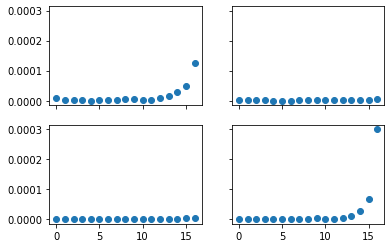

In [15]:
import time

from pythonds3.basic import Queue

import numpy as np 
import matplotlib.pyplot as plt

im1_times_enq = []
im2_times_enq = []
im1_times_deq = []
im2_times_deq = []

im1 = Queue()
im2 = QueueRear()

BASE = 2
MAX_EXP = 16

sizes = [BASE ** i for i in range(MAX_EXP + 1)]

for size in sizes:
    for n in np.arange(size):
        im1.enqueue(n)
        im2.enqueue(n)

    es1 = time.time()
    im1.enqueue(n + 1)
    ee1 = time.time()
    im1_times_enq.append(ee1 - es1)

    es2 = time.time()
    im2.enqueue(n + 1)
    ee2 = time.time()
    im2_times_enq.append(ee2 - es2)
    
    ds1 = time.time()
    i = im1.dequeue()
    de1 = time.time()
    im1_times_deq.append(de1 - ds1)

    ds2 = time.time()
    i = im2.dequeue()
    de2 = time.time()
    im2_times_deq.append(de2 - ds2)

im1_times_enq = np.array(im1_times_enq)
im2_times_enq = np.array(im2_times_enq)
im1_times_deq = np.array(im1_times_deq)
im2_times_deq = np.array(im2_times_deq)

x = np.arange(MAX_EXP + 1)
ys = [im1_times_enq, im2_times_enq, im1_times_deq, im2_times_deq]

fig, axs = plt.subplots(2, 2, sharex="all", sharey="all")

axs[0, 0].scatter(x, ys[0])
axs[0, 1].scatter(x, ys[1])
axs[1, 0].scatter(x, ys[2])
axs[1, 1].scatter(x, ys[3])

We see what we stated at the beginning: for `enqueue()` the first implementation is of linear complexity while `dequeue()` is constant. For the second implementation we have the opposite facts as we switched the implementation.

### 7. It is possible to implement a queue such that both enqueue and dequeue have 𝑂(1) performance on average. In this case it means that most of the time enqueue and dequeue will be 𝑂(1) except in one particular circumstance where dequeue will be 𝑂(𝑛). Create an implementation of a queue that would have an average performance of 𝑂(1) for enqueue and dequeue operations.

This has to be revised, but one thing is to use a list which keeps track of the last index we dequeued (so the dequeue using by indexing). In this way, both operations are $O(1)$. Since this list can potentially become very large, once the `head_index` reaches the last item, we refresh the list and the index itself.

In [16]:
class ConstantTimeQueue:
    def __init__(self):
        self.queue = []
        self.head_index = 0
        self.size = 0

    def enqueue(self, item):
        self.queue.append(item)
        self.size += 1

    def dequeue(self):
        if self.head_index >= self.size:
            print("Nothing to dequeue!")
        elif self.head_index == self.size - 1:
            item = self.queue[self.head_index]
            self.queue = []
            self.size = 0
            self.head_index = 0
            return item 
        else:
            item = self.queue[self.head_index]
            self.head_index += 1
            return item
        

### 8. Consider a real life situation. Formulate a question and then design a simulation that can help to answer it. Possible situations include:

* ### Cars lined up at a car wash
* ### Customers at a grocery store check-out
* ### Airplanes taking off and landing on a runway
* ### A bank teller

### Be sure to state any assumptions that you make and provide any probabilistic data that must be considered as part of the scenario.

* For the car wash scenario, I would simulate car waiting their turns in a first come first served fashion: a __Queue__ is a suitable data structure.
* Same as above, since users arrive in line, without any other complex assumption to make regarding the problem.
* Here we have to consider the departure and arrival times which are different for each flight: we use this time to create a "priority" for each flight asking to take off/land, two queues are necessary, and they are dequeued in order of priority.
* In the front desk, a bank teller would theoretically treat customers in a first come first served fashion, but since new banks have dedicated priority for _premium_ customers, we might use here a priority solution as well, which for every 1 standard customer, it processes 3 premium customers (if any of course).

Let's translate these formulations to code.

In [75]:
import random
import time
import string

from pythonds3 import Queue

class CarWash:
    def __init__(self):
        self.waiting_queue = Queue()

    def simulate(self, n_epochs=300, time_to_clean=3):
        epochs = 0
        entered = 0
        served = 0
        
        while epochs < n_epochs:
            appear = bool(epochs + random.randint(0, int(time.time())) % 2)
            if appear:
                car_plate = "".join(random.choices(string.ascii_uppercase + string.digits, k=10))
                print(f"Car {car_plate} appeared in queue!")
                self.waiting_queue.enqueue(car_plate)
                entered += 0
            
            if epochs % time_to_clean == 0 and (not self.waiting_queue.is_empty()):
                print(f"Car {self.waiting_queue.dequeue()} served!")
                served += 1

            epochs += 1
        
        return entered, served

class CheckoutCart:
    def __init__(self):
        self.waiting_line = Queue()

    def simulate(self, n_epochs=300, max_size_cart=5, time_per_item=1):
        epochs = 0
        entered = 0
        served = 0
        
        time_left_last_customer = 0
        last_customer = -1
        
        while epochs < n_epochs:
            appear = random.randint(0, int(time.time())) % 2 == 0
            if appear:
                cart_size = random.randint(1, max_size_cart)
                print(f"Customer no. {entered + 1} got in line with {cart_size}!")
                self.waiting_line.enqueue((entered + 1, cart_size))
                entered += 1
            
            if time_left_last_customer > 0:
                print(f"Still checking out customer {last_customer}!")
                time_left_last_customer -= 1
                if time_left_last_customer == 0:
                    print(f"Served customer {last_customer}! Total customers served: {served + 1}")
                    served += 1
            elif time_left_last_customer == 0 and (not self.waiting_line.is_empty()):
                c_number, c_cart_size = self.waiting_line.dequeue()
                time_left_last_customer = time_per_item * c_cart_size
                last_customer = c_number
                print(f"Serving customer {c_number} with cart size {c_cart_size} (taking {time_left_last_customer} epochs)!")
            else:
                print(f"Empty line!")
            
            epochs += 1
        
        return entered, served

class AirportRunaway:
    def __init__(self):
        self.departures = Queue()
        self.landings = Queue()

    def assign_priority(self, timestamp):
        return 10 ** 10 / int(timestamp)

    def simulate(self, n_epochs=300):
        epochs = 0

        while epochs < n_epochs:
            appear = random.randint(0, int(time.time())) % 2 == 0
            if appear:
                timestamp = time.time()
                operation = "departure" if random.randint(0, int(timestamp)) % 2 == 0 else "landing"
                flight_code = "".join(random.choices(string.ascii_uppercase + string.digits, k=8))
                priority = self.assign_priority(timestamp) 
                flight_dictionary = {"time": timestamp, "operation": operation, "flight_code": flight_code, "priority": priority}
                print(f"Flight no. {flight_code} in {operation} with priority {priority}!")
                if operation == "departure":
                    self.departures.enqueue(flight_dictionary)
                else:
                    self.landings.enqueue(flight_dictionary)

            
            next_departure = self.departures.dequeue() if not self.departures.is_empty() else None
            next_landing = self.landings.dequeue() if not self.landings.is_empty() else None
            ls = [next_departure, next_landing]

            if None not in ls:
                if next_landing["priority"] >= next_departure["priority"]:
                    print(f"Serving {next_landing['flight_code']} {next_landing['operation']}!")
                    print(f"Serving {next_departure['flight_code']} {next_departure['operation']}!")
                else:
                    print(f"Serving {next_departure['flight_code']} {next_departure['operation']}!")
                    print(f"Serving {next_landing['flight_code']} {next_landing['operation']}!")

            epochs += 1

class BankTeller:
    def __init__(self):
        self.standard_line = Queue()
        self.priority_line = Queue()

    def simulate(self, n_epochs=300):
        epochs = 0
        arrived = 0
        served = 0
        client_in_process = None
        next_end = -1
        next_clients = Queue()

        while epochs < n_epochs:
            appear = random.randint(0, int(time.time())) % 2 == 0
            if appear:
                is_standard = random.randint(0, 3) != 0
                if is_standard:
                    print(f"Client {arrived + 1} arrived (normal priority)!")
                    start = epochs
                    process_time = random.randint(0, n_epochs // (epochs + 1))
                    client = {"n": arrived + 1, "process_time": process_time}
                    self.standard_line.enqueue(client)
                else:
                    print(f"Client {arrived + 1} arrived (premium priority)!")
                    start = epochs
                    process_time = random.randint(0, n_epochs // (epochs + 1))
                    client = {"n": arrived + 1, "process_time": process_time}
                    self.priority_line.enqueue(client)
                
                arrived += 1

            for _ in range(3):
                if not self.priority_line.is_empty():
                    next_clients.enqueue(self.priority_line.dequeue())

            if not self.standard_line.is_empty():
                next_clients.enqueue(self.standard_line.dequeue())

            if client_in_process is None and (not next_clients.is_empty()):
                client_in_process = next_clients.dequeue()
                print(f"Now serving customer {client_in_process['n']}!")
                next_end = epochs + client_in_process["process_time"]

            if next_end == epochs:
                print(f"Served customer {client_in_process['n']}!")
                client_in_process = None 
                next_end = -1
            else:
                print(f"Still serving customer {client_in_process['n']}!")

            epochs += 1    
    

They're not realistic simulations but the idea is clear on how to handle different situations where we have a normal and pure first come first served approach and those particular situations where we need to work with priorities.